In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils
import torch.utils.data
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import pandas as pd

In [2]:
# Define the exact solution (Phi1)
def exact_solution_u(x, t):
    return (pi/2*torch.cos(x) + (x-pi/2))*torch.cos(t)

def initial_condition_u(x):
    return (pi/2*torch.cos(x) + (x-pi/2))

def initial_condition_u_t(x):
    return 0.0*pi*torch.cos(x) 

# Define the exact solution(w1)
def exact_solution_p(x, t):
    return pi/2*torch.sin(x)*torch.cos(t)

def initial_condition_p(x):
    return pi/2*torch.sin(x)

def initial_condition_p_t(x):
    return 0*torch.sin(x) 

# Define the exact solution (Phi1)
def exact_solution_u1(x, t):
    return (2/pi)*(pi/2*torch.cos(x) + (x-pi/2))*torch.cos(t)

def initial_condition_u1(x):
    return (2/pi)*(pi/2*torch.cos(x) + (x-pi/2))

def initial_condition_u_t1(x):
    return 0.0*pi*torch.cos(x) 

# Define the exact solution(w1)
def exact_solution_p1(x, t):
    return torch.sin(x)*torch.cos(t)

def initial_condition_p1(x):
    return torch.sin(x)

def initial_condition_p_t1(x):
    return 0*torch.sin(x) 


In [3]:
# importing files

In [4]:
inp_u1 = pd.read_csv(r'timo_data_u1_inverse.csv', header = None)
inp_u2 = pd.read_csv(r'timo_data_u2_inverse.csv', header = None)
inp_u3 = pd.read_csv(r'timo_data_u3_inverse.csv', header = None)
inp_u4 = pd.read_csv(r'timo_data_u4_inverse.csv', header = None)
inp_u5 = pd.read_csv(r'timo_data_u5_inverse.csv', header = None)
inp_u6 = pd.read_csv(r'timo_data_u6_inverse.csv', header = None)
inp_u7 = pd.read_csv(r'timo_data_u7_inverse.csv', header = None)
inp_u8 = pd.read_csv(r'timo_data_u8_inverse.csv', header = None)
inp_u9 = pd.read_csv(r'timo_data_u9_inverse.csv', header = None)
inp_u10 = pd.read_csv(r'timo_data_u10_inverse.csv', header = None)
inp_u11 = pd.read_csv(r'timo_data_u11_inverse.csv', header = None)
inp_u12 = pd.read_csv(r'timo_data_u12_inverse.csv', header = None)
inp_u13 = pd.read_csv(r'timo_data_u13_inverse.csv', header = None)
inp_u14 = pd.read_csv(r'timo_data_u14_inverse.csv', header = None)

In [5]:
inp_p1 = pd.read_csv(r'timo_data_p1_inverse.csv', header = None)
inp_p2 = pd.read_csv(r'timo_data_p2_inverse.csv', header = None)
inp_p3 = pd.read_csv(r'timo_data_p3_inverse.csv', header = None)
inp_p4 = pd.read_csv(r'timo_data_p4_inverse.csv', header = None)
inp_p5 = pd.read_csv(r'timo_data_p5_inverse.csv', header = None)
inp_p6 = pd.read_csv(r'timo_data_p6_inverse.csv', header = None)
inp_p7 = pd.read_csv(r'timo_data_p7_inverse.csv', header = None)
inp_p8 = pd.read_csv(r'timo_data_p8_inverse.csv', header = None)
inp_p9 = pd.read_csv(r'timo_data_p9_inverse.csv', header = None)
inp_p10 = pd.read_csv(r'timo_data_p10_inverse.csv', header = None)
inp_p11 = pd.read_csv(r'timo_data_p11_inverse.csv', header = None)
inp_p12 = pd.read_csv(r'timo_data_p12_inverse.csv', header = None)
inp_p13 = pd.read_csv(r'timo_data_p13_inverse.csv', header = None)
inp_p14 = pd.read_csv(r'timo_data_p14_inverse.csv', header = None)

In [6]:
inp_q1 = pd.read_csv(r'timo_data_q1_inverse.csv', header = None)
inp_q2 = pd.read_csv(r'timo_data_q2_inverse.csv', header = None)
inp_q3 = pd.read_csv(r'timo_data_q3_inverse.csv', header = None)
inp_q4 = pd.read_csv(r'timo_data_q4_inverse.csv', header = None)
inp_q5 = pd.read_csv(r'timo_data_q5_inverse.csv', header = None)
inp_q6 = pd.read_csv(r'timo_data_q6_inverse.csv', header = None)
inp_q7 = pd.read_csv(r'timo_data_q7_inverse.csv', header = None)
inp_q8 = pd.read_csv(r'timo_data_q8_inverse.csv', header = None)
inp_q9 = pd.read_csv(r'timo_data_q9_inverse.csv', header = None)
inp_q10 = pd.read_csv(r'timo_data_q10_inverse.csv', header = None)
inp_q11 = pd.read_csv(r'timo_data_q11_inverse.csv', header = None)
inp_q12 = pd.read_csv(r'timo_data_q12_inverse.csv', header = None)
inp_q13 = pd.read_csv(r'timo_data_q13_inverse.csv', header = None)
inp_q14 = pd.read_csv(r'timo_data_q14_inverse.csv', header = None)

In [7]:
inp_r1 = pd.read_csv(r'timo_data_r1_inverse.csv', header = None)
inp_r2 = pd.read_csv(r'timo_data_r2_inverse.csv', header = None)
inp_r3 = pd.read_csv(r'timo_data_r3_inverse.csv', header = None)
inp_r4 = pd.read_csv(r'timo_data_r4_inverse.csv', header = None)
inp_r5 = pd.read_csv(r'timo_data_r5_inverse.csv', header = None)
inp_r6 = pd.read_csv(r'timo_data_r6_inverse.csv', header = None)
inp_r7 = pd.read_csv(r'timo_data_r7_inverse.csv', header = None)
inp_r8 = pd.read_csv(r'timo_data_r8_inverse.csv', header = None)
inp_r9 = pd.read_csv(r'timo_data_r9_inverse.csv', header = None)
inp_r10 = pd.read_csv(r'timo_data_r10_inverse.csv', header = None)
inp_r11 = pd.read_csv(r'timo_data_r11_inverse.csv', header = None)
inp_r12 = pd.read_csv(r'timo_data_r12_inverse.csv', header = None)
inp_r13 = pd.read_csv(r'timo_data_r13_inverse.csv', header = None)
inp_r14 = pd.read_csv(r'timo_data_r14_inverse.csv', header = None)
inp_u14.shape

(100000, 3)

In [8]:
inp_u1 = inp_u1[::20]
inp_u2 = inp_u2[::20]
inp_u3 = inp_u3[::20]
inp_u4 = inp_u4[::20]
inp_u5 = inp_u5[::20]
inp_u6 = inp_u6[::20]
inp_u7 = inp_u7[::20]
inp_u8 = inp_u8[::20]
inp_u9 = inp_u9[::20]
inp_u10 = inp_u10[::20]
inp_u11 = inp_u11[::20]
inp_u12 = inp_u12[::20]
inp_u13 = inp_u13[::20]
inp_u14 = inp_u14[::20]


In [9]:
inp_p1 = inp_p1[::20]
inp_p2 = inp_p2[::20]
inp_p3 = inp_p3[::20]
inp_p4 = inp_p4[::20]
inp_p5 = inp_p5[::20]
inp_p6 = inp_p6[::20]
inp_p7 = inp_p7[::20]
inp_p8 = inp_p8[::20]
inp_p9 = inp_p9[::20]
inp_p10 = inp_p10[::20]
inp_p11 = inp_p11[::20]
inp_p12 = inp_p12[::20]
inp_p13 = inp_p13[::20]
inp_p14 = inp_p14[::20]

In [10]:
inp_q1 = inp_q1[::20]
inp_q2 = inp_q2[::20]
inp_q3 = inp_q3[::20]
inp_q4 = inp_q4[::20]
inp_q5 = inp_q5[::20]
inp_q6 = inp_q6[::20]
inp_q7 = inp_q7[::20]
inp_q8 = inp_q8[::20]
inp_q9 = inp_q9[::20]
inp_q10 = inp_q10[::20]
inp_q11 = inp_q11[::20]
inp_q12 = inp_q12[::20]
inp_q13 = inp_q13[::20]
inp_q14 = inp_q14[::20]

In [11]:
inp_r1 = inp_r1[::20]
inp_r2 = inp_r2[::20]
inp_r3 = inp_r3[::20]
inp_r4 = inp_r4[::20]
inp_r5 = inp_r5[::20]
inp_r6 = inp_r6[::20]
inp_r7 = inp_r7[::20]
inp_r8 = inp_r8[::20]
inp_r9 = inp_r9[::20]
inp_r10 = inp_r10[::20]
inp_r11 = inp_r11[::20]
inp_r12 = inp_r12[::20]
inp_r13 = inp_r13[::20]
inp_r14 = inp_r14[::20]

In [12]:
inputs_u1 = inp_u1.to_numpy()
inputs_p1 = inp_p1.to_numpy()
inputs_q1 = inp_q1.to_numpy()
inputs_r1 = inp_r1.to_numpy()
data_t1 = inputs_u1[:,0].astype(np.float32)
data_x1 = inputs_u1[:,1].astype(np.float32)
data_u1 = inputs_u1[:,2].astype(np.float32)
data_p1 = inputs_p1[:,2].astype(np.float32)

data_q1 = inputs_q1[:,2].astype(np.float32)
data_r1 = inputs_r1[:,2].astype(np.float32)

data_t1 = data_t1.reshape(-1, 1)
data_x1 = data_x1.reshape(-1, 1)
data_u1 = data_u1.reshape(-1, 1)
data_p1 = data_p1.reshape(-1, 1)
data_q1 = data_q1.reshape(-1, 1)
data_r1 = data_r1.reshape(-1, 1)



data_t1 = torch.from_numpy(data_t1)
data_x1 = torch.from_numpy(data_x1)
data_u1 = torch.from_numpy(data_u1)
data_p1 = torch.from_numpy(data_p1)
data_q1 = torch.from_numpy(data_q1)
data_r1 = torch.from_numpy(data_r1)
data_inp1 = torch.cat([data_x1, data_t1],1)

In [13]:
inputs_u2 = inp_u2.to_numpy()
inputs_p2 = inp_p2.to_numpy()
inputs_q2 = inp_q2.to_numpy()
inputs_r2 = inp_r2.to_numpy()
data_t2 = inputs_u2[:,0].astype(np.float32)
data_x2 = inputs_u2[:,1].astype(np.float32)
data_u2 = inputs_u2[:,2].astype(np.float32)
data_p2 = inputs_p2[:,2].astype(np.float32)
data_q2 = inputs_q2[:,2].astype(np.float32)
data_r2 = inputs_r2[:,2].astype(np.float32)

data_t2 = data_t2.reshape(-1, 1)
data_x2 = data_x2.reshape(-1, 1)
data_u2 = data_u2.reshape(-1, 1)
data_p2 = data_u2.reshape(-1, 1)
data_q2 = data_u2.reshape(-1, 1)
data_r2 = data_r2.reshape(-1, 1)

data_t2 = torch.from_numpy(data_t2)
data_x2 = torch.from_numpy(data_x2)
data_u2 = torch.from_numpy(data_u2)
data_p2 = torch.from_numpy(data_p2)
data_q2 = torch.from_numpy(data_q2)
data_r2 = torch.from_numpy(data_r2)

data_inp2 = torch.cat([data_x2, data_t2],1)

In [14]:
inputs_u3 = inp_u3.to_numpy()
inputs_p3 = inp_p3.to_numpy()
inputs_q3 = inp_q3.to_numpy()
inputs_r3 = inp_r3.to_numpy()
data_t3 = inputs_u3[:,0].astype(np.float32)
data_x3 = inputs_u3[:,1].astype(np.float32)
data_u3 = inputs_u3[:,2].astype(np.float32)
data_q3 = inputs_q3[:,2].astype(np.float32)
data_r3 = inputs_r3[:,2].astype(np.float32)
data_p3 = inputs_p3[:,2].astype(np.float32)
data_t3 = data_t3.reshape(-1, 1)
data_x3 = data_x3.reshape(-1, 1)
data_u3 = data_u3.reshape(-1, 1)
data_p3 = data_p3.reshape(-1, 1)
data_q3 = data_q3.reshape(-1, 1)
data_r3 = data_r3.reshape(-1, 1)
data_t3 = torch.from_numpy(data_t3)
data_x3 = torch.from_numpy(data_x3)
data_u3 = torch.from_numpy(data_u3)
data_p3 = torch.from_numpy(data_p3)
data_q3 = torch.from_numpy(data_q3)
data_r3 = torch.from_numpy(data_r3)
data_inp3 = torch.cat([data_x3, data_t3],1)

In [15]:
inputs_u4 = inp_u4.to_numpy()
inputs_p4 = inp_p4.to_numpy()
inputs_q4 = inp_q4.to_numpy()
inputs_r4 = inp_r4.to_numpy()
data_t4 = inputs_u4[:,0].astype(np.float32)
data_x4 = inputs_u4[:,1].astype(np.float32)
data_u4 = inputs_u4[:,2].astype(np.float32)
data_p4 = inputs_p4[:,2].astype(np.float32)
data_q4 = inputs_q4[:,2].astype(np.float32)
data_r4 = inputs_r4[:,2].astype(np.float32)


data_t4 = data_t4.reshape(-1, 1)
data_x4 = data_x4.reshape(-1, 1)
data_u4 = data_u4.reshape(-1, 1)
data_p4 = data_p4.reshape(-1, 1)
data_q4 = data_q4.reshape(-1, 1)
data_r4 = data_r4.reshape(-1, 1)

data_t4 = torch.from_numpy(data_t4)
data_x4 = torch.from_numpy(data_x4)
data_u4 = torch.from_numpy(data_u4)
data_p4 = torch.from_numpy(data_p4)
data_q4 = torch.from_numpy(data_q4)
data_r4 = torch.from_numpy(data_r4)
data_inp4 = torch.cat([data_x4, data_t4],1)

In [16]:
inputs_u5 = inp_u5.to_numpy()
inputs_p5 = inp_p5.to_numpy()
inputs_q5 = inp_q5.to_numpy()
inputs_r5 = inp_r5.to_numpy()
data_t5 = inputs_u5[:,0].astype(np.float32)
data_x5 = inputs_u5[:,1].astype(np.float32)
data_u5 = inputs_u5[:,2].astype(np.float32)
data_p5 = inputs_p5[:,2].astype(np.float32)
data_q5 = inputs_q5[:,2].astype(np.float32)
data_r5 = inputs_r5[:,2].astype(np.float32)

data_t5 = data_t5.reshape(-1, 1)
data_x5 = data_x5.reshape(-1, 1)
data_u5 = data_u5.reshape(-1, 1)
data_p5 = data_p5.reshape(-1, 1)
data_q5 = data_q5.reshape(-1, 1)
data_r5 = data_r5.reshape(-1, 1)

data_t5 = torch.from_numpy(data_t5)
data_x5 = torch.from_numpy(data_x5)
data_u5 = torch.from_numpy(data_u5)
data_p5 = torch.from_numpy(data_p5)
data_q5 = torch.from_numpy(data_q5)
data_r5 = torch.from_numpy(data_r5)
data_inp5 = torch.cat([data_x5, data_t5],1)

In [17]:
inputs_u6 = inp_u6.to_numpy()
inputs_p6 = inp_p6.to_numpy()
inputs_q6 = inp_q6.to_numpy()
inputs_r6 = inp_r6.to_numpy()
data_t6 = inputs_u6[:,0].astype(np.float32)
data_x6 = inputs_u6[:,1].astype(np.float32)
data_u6 = inputs_u6[:,2].astype(np.float32)
data_p6 = inputs_p6[:,2].astype(np.float32)
data_q6 = inputs_q6[:,2].astype(np.float32)
data_r6 = inputs_r6[:,2].astype(np.float32)

data_t6 = data_t6.reshape(-1, 1)
data_x6 = data_x6.reshape(-1, 1)
data_u6 = data_u6.reshape(-1, 1)
data_p6 = data_p6.reshape(-1, 1)
data_q6 = data_q6.reshape(-1, 1)
data_r6 = data_r6.reshape(-1, 1)

data_t6 = torch.from_numpy(data_t6)
data_x6 = torch.from_numpy(data_x6)
data_u6 = torch.from_numpy(data_u6)
data_p6 = torch.from_numpy(data_p6)
data_q6 = torch.from_numpy(data_q6)
data_r6 = torch.from_numpy(data_r6)

data_inp6 = torch.cat([data_x6, data_t6],1)

In [18]:
inputs_u7 = inp_u7.to_numpy()
inputs_p7 = inp_p7.to_numpy()
inputs_q7 = inp_q7.to_numpy()
inputs_r7 = inp_r7.to_numpy()
data_t7 = inputs_u7[:,0].astype(np.float32)
data_x7 = inputs_u7[:,1].astype(np.float32)
data_u7 = inputs_u7[:,2].astype(np.float32)
data_p7 = inputs_p7[:,2].astype(np.float32)
data_q7 = inputs_q7[:,2].astype(np.float32)
data_r7 = inputs_r7[:,2].astype(np.float32)


data_t7 = data_t7.reshape(-1, 1)
data_x7 = data_x7.reshape(-1, 1)
data_u7 = data_u7.reshape(-1, 1)
data_p7 = data_p7.reshape(-1, 1)
data_q7 = data_q7.reshape(-1, 1)
data_r7 = data_r7.reshape(-1, 1)

data_t7 = torch.from_numpy(data_t7)
data_x7 = torch.from_numpy(data_x7)
data_u7 = torch.from_numpy(data_u7)
data_p7 = torch.from_numpy(data_p7)
data_q7 = torch.from_numpy(data_q7)
data_r7 = torch.from_numpy(data_r7)

data_inp7 = torch.cat([data_x7, data_t7],1)

In [19]:
inputs_u8 = inp_u8.to_numpy()
inputs_p8 = inp_p8.to_numpy()
inputs_q8 = inp_q8.to_numpy()
inputs_r8 = inp_r8.to_numpy()
data_t8 = inputs_u8[:,0].astype(np.float32)
data_x8 = inputs_u8[:,1].astype(np.float32)
data_u8 = inputs_u8[:,2].astype(np.float32)
data_p8 = inputs_p8[:,2].astype(np.float32)
data_q8 = inputs_q8[:,2].astype(np.float32)
data_r8 = inputs_r8[:,2].astype(np.float32)
data_t8 = data_t8.reshape(-1, 1)
data_x8 = data_x8.reshape(-1, 1)
data_u8 = data_u8.reshape(-1, 1)
data_p8 = data_p8.reshape(-1, 1)
data_q8 = data_q8.reshape(-1, 1)
data_r8 = data_r8.reshape(-1, 1)


data_t8 = torch.from_numpy(data_t8)
data_x8 = torch.from_numpy(data_x8)
data_u8 = torch.from_numpy(data_u8)
data_p8 = torch.from_numpy(data_p8)
data_q8 = torch.from_numpy(data_q8)
data_r8 = torch.from_numpy(data_r8)
data_inp8 = torch.cat([data_x8, data_t8],1)
data_inp6

tensor([[1.2000, 0.0816],
        [1.2000, 0.1675],
        [1.2000, 0.4677],
        ...,
        [1.2000, 0.6073],
        [1.2000, 0.7788],
        [1.2000, 0.4529]])

In [20]:
inputs_u9 = inp_u9.to_numpy()
inputs_p9 = inp_p9.to_numpy()
inputs_q9 = inp_q9.to_numpy()
inputs_r9 = inp_r9.to_numpy()

data_t9 = inputs_u9[:,0].astype(np.float32)
data_x9 = inputs_u9[:,1].astype(np.float32)

data_u9 = inputs_u9[:,2].astype(np.float32)
data_p9 = inputs_p9[:,2].astype(np.float32)
data_q9 = inputs_q9[:,2].astype(np.float32)
data_r9 = inputs_r9[:,2].astype(np.float32)

data_t9 = data_t9.reshape(-1, 1)
data_x9 = data_x9.reshape(-1, 1)
data_u9 = data_u9.reshape(-1, 1)
data_p9 = data_p9.reshape(-1, 1)
data_q9 = data_q9.reshape(-1, 1)
data_r9 = data_r9.reshape(-1, 1)

data_t9 = torch.from_numpy(data_t9)
data_x9 = torch.from_numpy(data_x9)
data_u9 = torch.from_numpy(data_u9)
data_p9 = torch.from_numpy(data_p9)
data_q9 = torch.from_numpy(data_q9)
data_r9 = torch.from_numpy(data_r9)
data_inp9 = torch.cat([data_x9, data_t9],1)

In [21]:
inputs_u10 = inp_u10.to_numpy()
inputs_p10 = inp_p10.to_numpy()
inputs_q10 = inp_q10.to_numpy()
inputs_r10 = inp_r10.to_numpy()

data_t10 = inputs_u10[:,0].astype(np.float32)
data_x10 = inputs_u10[:,1].astype(np.float32)
data_u10 = inputs_u10[:,2].astype(np.float32)
data_p10 = inputs_p10[:,2].astype(np.float32)
data_q10 = inputs_q10[:,2].astype(np.float32)
data_r10 = inputs_r10[:,2].astype(np.float32)

data_t10 = data_t10.reshape(-1, 1)
data_x10 = data_x10.reshape(-1, 1)
data_u10 = data_u10.reshape(-1, 1)
data_p10 = data_p10.reshape(-1, 1)
data_q10 = data_q10.reshape(-1, 1)
data_r10 = data_r10.reshape(-1, 1)

data_t10 = torch.from_numpy(data_t10)
data_x10 = torch.from_numpy(data_x10)
data_u10 = torch.from_numpy(data_u10)
data_p10 = torch.from_numpy(data_p10)
data_q10 = torch.from_numpy(data_q10)
data_r10 = torch.from_numpy(data_r10)
data_inp10 = torch.cat([data_x10, data_t10],1)

In [22]:
inputs_u11 = inp_u11.to_numpy()
inputs_p11 = inp_p11.to_numpy()
inputs_q11 = inp_q11.to_numpy()
inputs_r11 = inp_r11.to_numpy()

data_t11 = inputs_u11[:,0].astype(np.float32)
data_x11 = inputs_u11[:,1].astype(np.float32)
data_u11 = inputs_u11[:,2].astype(np.float32)
data_p11 = inputs_p11[:,2].astype(np.float32)
data_q11 = inputs_q11[:,2].astype(np.float32)
data_r11 = inputs_r11[:,2].astype(np.float32)


data_t11 = data_t11.reshape(-1, 1)
data_x11 = data_x11.reshape(-1, 1)
data_u11 = data_u11.reshape(-1, 1)
data_p11 = data_p11.reshape(-1, 1)
data_q11 = data_q11.reshape(-1, 1)
data_r11 = data_r11.reshape(-1, 1)




data_t11 = torch.from_numpy(data_t11)
data_x11 = torch.from_numpy(data_x11)
data_u11 = torch.from_numpy(data_u11)
data_p11 = torch.from_numpy(data_p11)
data_q11 = torch.from_numpy(data_q11)
data_r11 = torch.from_numpy(data_r11)

data_inp11 = torch.cat([data_x11, data_t11],1)

In [23]:
inputs_u12 = inp_u12.to_numpy()
inputs_p12 = inp_p12.to_numpy()
inputs_q12 = inp_q12.to_numpy()
inputs_r12 = inp_r12.to_numpy()

data_t12 = inputs_u12[:,0].astype(np.float32)
data_x12 = inputs_u12[:,1].astype(np.float32)
data_u12 = inputs_u12[:,2].astype(np.float32)
data_p12 = inputs_p12[:,2].astype(np.float32)
data_q12 = inputs_q12[:,2].astype(np.float32)
data_r12 = inputs_r12[:,2].astype(np.float32)



data_t12 = data_t12.reshape(-1, 1)
data_x12 = data_x12.reshape(-1, 1)
data_u12 = data_u12.reshape(-1, 1)
data_p12 = data_p12.reshape(-1, 1)
data_q12 = data_q12.reshape(-1, 1)
data_r12 = data_r12.reshape(-1, 1)

data_t12 = torch.from_numpy(data_t12)
data_x12 = torch.from_numpy(data_x12)
data_u12 = torch.from_numpy(data_u12)
data_p12 = torch.from_numpy(data_p12)
data_q12 = torch.from_numpy(data_q12)
data_r12 = torch.from_numpy(data_r12)
data_inp12 = torch.cat([data_x12, data_t12],1)

In [24]:
inputs_u13 = inp_u13.to_numpy()
inputs_p13 = inp_p13.to_numpy()
inputs_q13 = inp_q13.to_numpy()
inputs_r13 = inp_r13.to_numpy()

data_t13 = inputs_u13[:,0].astype(np.float32)
data_x13 = inputs_u13[:,1].astype(np.float32)
data_u13 = inputs_u13[:,2].astype(np.float32)
data_p13 = inputs_p13[:,2].astype(np.float32)
data_q13 = inputs_q13[:,2].astype(np.float32)
data_r13 = inputs_r13[:,2].astype(np.float32)

data_t13 = data_t13.reshape(-1, 1)
data_x13 = data_x13.reshape(-1, 1)
data_u13 = data_u13.reshape(-1, 1)
data_p13 = data_p13.reshape(-1, 1)
data_q13 = data_q13.reshape(-1, 1)
data_r13 = data_r13.reshape(-1, 1)

data_t13 = torch.from_numpy(data_t13)
data_x13 = torch.from_numpy(data_x13)
data_u13 = torch.from_numpy(data_u13)
data_p13 = torch.from_numpy(data_p13)
data_q13 = torch.from_numpy(data_q13)
data_r13 = torch.from_numpy(data_r13)
data_inp13 = torch.cat([data_x13, data_t13],1)

In [25]:
inputs_u14 = inp_u14.to_numpy()
inputs_p14 = inp_p14.to_numpy()
inputs_q14 = inp_q14.to_numpy()
inputs_r14 = inp_r14.to_numpy()

data_t14 = inputs_u14[:,0].astype(np.float32)
data_x14 = inputs_u14[:,1].astype(np.float32)
data_u14 = inputs_u14[:,2].astype(np.float32)
data_p14 = inputs_p14[:,2].astype(np.float32)
data_q14 = inputs_q14[:,2].astype(np.float32)
data_r14 = inputs_r14[:,2].astype(np.float32)

data_t14 = data_t14.reshape(-1, 1)
data_x14 = data_x14.reshape(-1, 1)
data_u14 = data_u14.reshape(-1, 1)
data_p14 = data_p14.reshape(-1, 1)
data_q14 = data_q14.reshape(-1, 1)
data_r14 = data_r14.reshape(-1, 1)

data_t14 = torch.from_numpy(data_t14)
data_x14 = torch.from_numpy(data_x14)
data_u14 = torch.from_numpy(data_u14)
data_p14 = torch.from_numpy(data_p14)
data_q14 = torch.from_numpy(data_q14)
data_r14 = torch.from_numpy(data_r14)
data_inp14 = torch.cat([data_x14, data_t14],1)

In [26]:
# assigning number of points
initial_pts = 2000
left_boundary_pts = 2000
right_boundary_pts = 2000
residual_pts = 10000
# Type of optimizer (ADAM or LBFGS)
opt_type = "LBFGS"
manualSeed = 1

#np.random.seed(manualSeed)
#random.seed(manualSeed)
torch.manual_seed(manualSeed)

x_init = pi*torch.rand((initial_pts,1)) # initial pts
t_init = 0*x_init
init =  torch.cat([x_init, t_init],1)
u_init = initial_condition_u(init[:,0]).reshape(-1, 1)
p_init = initial_condition_p(init[:,0]).reshape(-1, 1)
u1_init = initial_condition_u1(init[:,0]).reshape(-1, 1)
p1_init = initial_condition_p1(init[:,0]).reshape(-1, 1)
w_init = torch.cat([u_init, p_init, u1_init, p1_init],1)

u_t_init = initial_condition_u_t(init[:,0]).reshape(-1, 1)
p_t_init = initial_condition_p_t(init[:,0]).reshape(-1, 1)
u1_t_init = initial_condition_u_t1(init[:,0]).reshape(-1, 1)
p1_t_init = initial_condition_p_t1(init[:,0]).reshape(-1, 1)
w_t_init = torch.cat([u_t_init, p_t_init, u1_t_init, p1_t_init],1)



xb_left = torch.zeros((left_boundary_pts, 1)) # left spatial boundary
tb_left = torch.rand((left_boundary_pts, 1)) # 
b_left = torch.cat([xb_left, tb_left ],1)
u_b_l = exact_solution_u(xb_left, tb_left)
p_b_l = exact_solution_p(xb_left, tb_left)
u1_b_l = exact_solution_u1(xb_left, tb_left)
p1_b_l = exact_solution_p1(xb_left, tb_left)
w_b_l = torch.cat([u_b_l, p_b_l, u1_b_l, p1_b_l],1)



xb_right = pi*torch.ones((right_boundary_pts, 1)) # right spatial boundary
tb_right = torch.rand((right_boundary_pts, 1)) # right boundary pts
b_right = torch.cat([xb_right, tb_right ],1)
u_b_r = exact_solution_u(xb_right, tb_right)
p_b_r = exact_solution_p(xb_right, tb_right)
u1_b_r = exact_solution_u1(xb_right, tb_right)
p1_b_r = exact_solution_p1(xb_right, tb_right)
w_b_r = torch.cat([u_b_r, p_b_r, u1_b_r, p1_b_r],1)

x_interior = pi*torch.rand((residual_pts, 1))
t_interior = torch.rand((residual_pts, 1))
interior = torch.cat([x_interior, t_interior],1)





training_set = DataLoader(torch.utils.data.TensorDataset(init, w_init, w_t_init, b_left,  b_right), batch_size=2000, shuffle=False)

class NeuralNet(nn.Module):

    def __init__(self, input_dimension, output_dimension, n_hidden_layers, neurons):
        super(NeuralNet, self).__init__()
        # Number of input dimensions n
        self.input_dimension = input_dimension
        # Number of output dimensions m
        self.output_dimension = output_dimension
        # Number of neurons per layer 
        self.neurons = neurons
        # Number of hidden layers 
        self.n_hidden_layers = n_hidden_layers
        # Activation function 
        self.activation = nn.Tanh()
        
        self.input_layer = nn.Linear(self.input_dimension, self.neurons)
        self.hidden_layers = nn.ModuleList([nn.Linear(self.neurons, self.neurons) for _ in range(n_hidden_layers)])
        self.output_layer = nn.Linear(self.neurons, self.output_dimension)

    def forward(self, x):
        # The forward function performs the set of affine and non-linear transformations defining the network 
        # (see equation above)
        x = self.activation(self.input_layer(x))
        for k, l in enumerate(self.hidden_layers):
            x = self.activation(l(x))
        return self.output_layer(x)
# Model definition
my_network = NeuralNet(input_dimension = init.shape[1], output_dimension = 5, n_hidden_layers=4, neurons=20)

def init_xavier(model, retrain_seed):
    torch.manual_seed(retrain_seed)
    def init_weights(m):
        if type(m) == nn.Linear and m.weight.requires_grad and m.bias.requires_grad:
            g = nn.init.calculate_gain('tanh')
            torch.nn.init.xavier_uniform_(m.weight, gain=g)
            #torch.nn.init.xavier_normal_(m.weight, gain=g)
            m.bias.data.fill_(0)
    model.apply(init_weights)

# Random Seed for weight initialization
retrain = 128
# Xavier weight initialization
init_xavier(my_network, retrain)
#print(my_network(init))

if opt_type == "ADAM":
    optimizer_ = optim.Adam(my_network.parameters(), lr=0.001)
elif opt_type == "LBFGS":
    optimizer_ = optim.LBFGS(my_network.parameters(), lr=0.1, max_iter=1, max_eval=50000, tolerance_change=1.0 * np.finfo(float).eps)
else:
    raise ValueError("Optimizer not recognized")
    
def fit(model, training_set, interior, num_epochs, optimizer, p, verbose=True):
    history = list()
    
    # Loop over epochs
    for epoch in range(num_epochs):
        if verbose: print("################################ ", epoch, " ################################")

        running_loss = list([0])
        
        # Loop over batches
        for j, (initial, w_initial, w_initial_t, bd_left,  bd_right) in enumerate(training_set):
            
            def closure():
                # zero the parameter gradients
                optimizer.zero_grad()
                                
                bd_left.requires_grad = True
                bd_right.requires_grad = True
                # for initial
                initial.requires_grad = True
                w_initial_pred_ = model(initial)
                u_initial_pred_ = w_initial_pred_[:,0].reshape(-1,1)
                p_initial_pred_ = w_initial_pred_[:,1].reshape(-1,1)
                u1_initial_pred_ = w_initial_pred_[:,2].reshape(-1,1)
                p1_initial_pred_ = w_initial_pred_[:,3].reshape(-1,1)
                
                

                
                
                # with derivative
                inpu = torch.ones(initial_pts, 1 )
                
                grad_u_ini = torch.autograd.grad(u_initial_pred_, initial, grad_outputs=inpu, create_graph=True, allow_unused=True)[0]
                
                u_initial_t = grad_u_ini[:, 1]
                
                
                grad_p_ini = torch.autograd.grad(p_initial_pred_, initial, grad_outputs=inpu, create_graph=True)[0]
                
                p_initial_t = grad_p_ini[:, 1]
                
                grad_u1_ini = torch.autograd.grad(u1_initial_pred_, initial, grad_outputs=inpu, create_graph=True, allow_unused=True)[0]
                
                u1_initial_t = grad_u1_ini[:, 1]
                
                
                grad_p1_ini = torch.autograd.grad(p1_initial_pred_, initial, grad_outputs=inpu, create_graph=True)[0]
                
                p1_initial_t = grad_p1_ini[:, 1]
                
                
                

                
                

                # for left boundary
                w_bd_left_pred_ = model(bd_left)
                u_bd_left_pred_ = w_bd_left_pred_[:,0].reshape(-1,1)
                p_bd_left_pred_ = w_bd_left_pred_[:,1].reshape(-1,1)
                
                u1_bd_left_pred_ = w_bd_left_pred_[:,2].reshape(-1,1)
                p1_bd_left_pred_ = w_bd_left_pred_[:,3].reshape(-1,1)
                
                # for right boundary
                w_bd_right_pred_ = model(bd_right)
                u_bd_right_pred_ = w_bd_right_pred_[:,0].reshape(-1,1)
                p_bd_right_pred_ = w_bd_right_pred_[:,1].reshape(-1,1)
                
                u1_bd_right_pred_ = w_bd_right_pred_[:,2].reshape(-1,1)
                p1_bd_right_pred_ = w_bd_right_pred_[:,3].reshape(-1,1)
                


                inputs2 = torch.ones(left_boundary_pts, 1)
                inputs3 = torch.ones(right_boundary_pts, 1)
                grad_u_b_l = torch.autograd.grad(u_bd_left_pred_, bd_left, grad_outputs=inputs2, create_graph=True)[0]
                grad_u_b_r = torch.autograd.grad(u_bd_right_pred_, bd_right, grad_outputs=inputs3, create_graph=True)[0]
                u_b_l_x = grad_u_b_l[:, 0]
                u_b_r_x = grad_u_b_r[:, 0]
                
                u_b_l_xx = torch.autograd.grad(u_b_l_x, bd_left, grad_outputs=torch.ones(bd_left.shape[0]), create_graph=True)[0]
                u_bd_left_xx = u_b_l_xx[:, 0].reshape(-1,1)

                u_b_r_xx = torch.autograd.grad(u_b_r_x, bd_right, grad_outputs=torch.ones(bd_right.shape[0]), create_graph=True)[0]
                u_bd_right_xx = u_b_r_xx[:, 0].reshape(-1,1)
                
                inputs4 = torch.ones(left_boundary_pts, 1)
                inputs5 = torch.ones(right_boundary_pts, 1)
                grad_v_b_l = torch.autograd.grad(p_bd_left_pred_, bd_left, grad_outputs=inputs4, create_graph=True)[0]
                grad_v_b_r = torch.autograd.grad(p_bd_right_pred_, bd_right, grad_outputs=inputs5, create_graph=True)[0]
                v_b_l_x = grad_v_b_l[:, 0]
                v_b_r_x = grad_v_b_r[:, 0]
                
                v_b_l_xx = torch.autograd.grad(v_b_l_x, bd_left, grad_outputs=torch.ones(bd_left.shape[0]), create_graph=True)[0]
                v_bd_left_xx = v_b_l_xx[:, 0].reshape(-1,1)

                v_b_r_xx = torch.autograd.grad(v_b_r_x, bd_right, grad_outputs=torch.ones(bd_right.shape[0]), create_graph=True)[0]
                v_bd_right_xx = v_b_r_xx[:, 0].reshape(-1,1)
                

                
                
                
               
                # predicted force
                # (1-torch.sin(interior[:, 0]))*torch.cos(interior[:, 1]).reshape(-1, )
                
                # residual calculation
                interior.requires_grad = True
                w_hat = model(interior)
                u_hat = w_hat[:,0].reshape(-1,1)
                p_hat = w_hat[:,1].reshape(-1,1)
                u1_hat = w_hat[:,2].reshape(-1,1)
                p1_hat = w_hat[:,3].reshape(-1,1)
                
                inputs = torch.ones(residual_pts, 1 )
                inputs2 = torch.ones(residual_pts, 1)
                grad_u_hat = torch.autograd.grad(u_hat.reshape(-1,1), interior, grad_outputs=inputs, create_graph=True)[0]
                
                u_x = grad_u_hat[:, 0].reshape(-1,1)
                
                grad_u_hat_xx = torch.autograd.grad(u_x, interior, grad_outputs=inputs, create_graph=True)[0]
                
                u_xx = grad_u_hat_xx[:, 0].reshape(-1,1)
                
                grad_u_hat_xxx = torch.autograd.grad(u_xx, interior, grad_outputs=inputs, create_graph=True)[0]
                
                u_xxx = grad_u_hat_xxx[:, 0].reshape(-1,1)
                
                grad_u_hat_xxxx = torch.autograd.grad(u_xxx, interior, grad_outputs=inputs, create_graph=True)[0]
                
                u_xxxx = grad_u_hat_xxxx[:, 0].reshape(-1,1)
                
                
                
                
                
                grad_p_hat = torch.autograd.grad(p_hat, interior, grad_outputs=inputs, create_graph=True)[0]
                
                p_x = grad_p_hat[:, 0].reshape(-1,1)
                
                grad_p_hat_xx = torch.autograd.grad(p_x, interior, grad_outputs=inputs, create_graph=True)[0]
                
                p_xx = grad_p_hat_xx[:, 0].reshape(-1,1)
                
                grad_p_hat_xxx = torch.autograd.grad(p_xx, interior, grad_outputs=inputs, create_graph=True)[0]
                
                p_xxx = grad_p_hat_xxx[:, 0].reshape(-1,1)
                
                grad_p_hat_xxxx = torch.autograd.grad(p_xxx, interior, grad_outputs=inputs, create_graph=True)[0]
                
                p_xxxx = grad_p_hat_xxxx[:, 0].reshape(-1,1)
                
                
                grad_u1_hat = torch.autograd.grad(u1_hat.reshape(-1,1), interior, grad_outputs=inputs, create_graph=True)[0]
                
                u1_x = grad_u1_hat[:, 0].reshape(-1,1)
                
                grad_u1_hat_xx = torch.autograd.grad(u1_x, interior, grad_outputs=inputs, create_graph=True)[0]
                
                u1_xx = grad_u1_hat_xx[:, 0].reshape(-1,1)
                
                
                
                
                grad_p1_hat = torch.autograd.grad(p1_hat, interior, grad_outputs=inputs, create_graph=True)[0]
                
                p1_x = grad_p1_hat[:, 0].reshape(-1,1)
                
                grad_p1_hat_xx = torch.autograd.grad(p1_x, interior, grad_outputs=inputs, create_graph=True)[0]
                
                p1_xx = grad_p1_hat_xx[:, 0].reshape(-1,1)
                
                
                
                
                

                
                
                
                
                #grad_grad_u_x = torch.autograd.grad(u_x, interior, grad_outputs=torch.ones(interior.shape[0]), create_graph=True)[0]
                #u_xx = grad_grad_u_x[:, 0]
                u_t = grad_u_hat[:, 1].reshape(-1,1)
                
                grad_u_hat_tt = torch.autograd.grad(u_t, interior, grad_outputs=inputs, create_graph=True)[0]
                
                u_tt = grad_u_hat_tt[:, 1].reshape(-1,1)
                
                p_t = grad_p_hat[:,1].reshape(-1,1)
                grad_p_hat_tt = torch.autograd.grad(p_t, interior, grad_outputs=inputs, create_graph=True)[0]
                
                p_tt = grad_p_hat_tt[:, 1].reshape(-1,1)
                
                
                u1_t = grad_u1_hat[:, 1].reshape(-1,1)
                
                grad_u1_hat_tt = torch.autograd.grad(u1_t, interior, grad_outputs=inputs, create_graph=True)[0]
                
                u1_tt = grad_u1_hat_tt[:, 1].reshape(-1,1)
                
                p1_t = grad_p1_hat[:,1].reshape(-1,1)
                grad_p1_hat_tt = torch.autograd.grad(p1_t, interior, grad_outputs=inputs, create_graph=True)[0]
                
                p1_tt = grad_p1_hat_tt[:, 1].reshape(-1,1)
                
                
                
                # data
                
                u_data_pred1 = model(data_inp1)
                
                u_data_pred2 = model(data_inp2)
                
                u_data_pred3 = model(data_inp3)
                
                u_data_pred4 = model(data_inp4)
               
                u_data_pred5 = model(data_inp5)
                
                u_data_pred6 = model(data_inp6)
                
                u_data_pred7 = model(data_inp7)
                
                u_data_pred8 = model(data_inp8)
                
                u_data_pred9 = model(data_inp9)
                
                u_data_pred10 = model(data_inp10)
                
                u_data_pred11 = model(data_inp11)
                
                u_data_pred12 = model(data_inp12)
                
                u_data_pred13 = model(data_inp13)
                
                u_data_pred14 = model(data_inp14)
                
                # p_data and u_data
                #data = torch.mean((u_data_pred1[:,1].reshape(-1, )- data_p1.reshape(-1, ))**p) + torch.mean((u_data_pred4[:,1].reshape(-1, ) - data_p4.reshape(-1, ))**p)
                #data1 = torch.mean((u_data_pred1[:,0].reshape(-1, )- data_u1.reshape(-1, ))**p) + torch.mean((u_data_pred4[:,0].reshape(-1, ) - data_u4.reshape(-1, ))**p)
                
                #data2 = torch.mean((u_data_pred14[:,1].reshape(-1, )- data_p14.reshape(-1, ))**p) +  torch.mean((u_data_pred12[:,1].reshape(-1, ) - data_p12.reshape(-1, ))**p)
                #data3 = torch.mean((u_data_pred14[:,0].reshape(-1, )- data_u14.reshape(-1, ))**p) + torch.mean((u_data_pred12[:,0].reshape(-1, ) - data_u12.reshape(-1, ))**p)
                #data4 =  torch.mean((u_data_pred8[:,1].reshape(-1, ) - data_p8.reshape(-1, ))**p) + torch.mean((u_data_pred10[:,1].reshape(-1, ) - data_p10.reshape(-1, ))**p) 
                #data5 =  torch.mean((u_data_pred8[:,0].reshape(-1, ) - data_u8.reshape(-1, ))**p) + torch.mean((u_data_pred10[:,0].reshape(-1, ) - data_u10.reshape(-1, ))**p)
                
                # data_q and data_r
                #data6 = torch.mean((u_data_pred1[:,2].reshape(-1, )- data_q1.reshape(-1, ))**p) + torch.mean((u_data_pred4[:,2].reshape(-1, ) - data_q4.reshape(-1, ))**p)
                #data7 = torch.mean((u_data_pred1[:,3].reshape(-1, )- data_r1.reshape(-1, ))**p) + torch.mean((u_data_pred4[:,3].reshape(-1, ) - data_r4.reshape(-1, ))**p)
                
                #data8 = torch.mean((u_data_pred14[:,2].reshape(-1, )- data_q14.reshape(-1, ))**p) +  torch.mean((u_data_pred12[:,2].reshape(-1, ) - data_q12.reshape(-1, ))**p)
                #data9 = torch.mean((u_data_pred14[:,3].reshape(-1, )- data_r14.reshape(-1, ))**p) + torch.mean((u_data_pred12[:,3].reshape(-1, ) - data_r12.reshape(-1, ))**p)
                #data10 =  torch.mean((u_data_pred8[:,2].reshape(-1, ) - data_q8.reshape(-1, ))**p) + torch.mean((u_data_pred10[:,2].reshape(-1, ) - data_q10.reshape(-1, ))**p) 
                #data11 =  torch.mean((u_data_pred8[:,3].reshape(-1, ) - data_r8.reshape(-1, ))**p) + torch.mean((u_data_pred10[:,3].reshape(-1, ) - data_r10.reshape(-1, ))**p)
                
                # additional data for one more location at x = 1.2 point 6
                
                #data12 = torch.mean((u_data_pred6[:,1].reshape(-1, ) - data_p6.reshape(-1, ))**p) + torch.mean((u_data_pred6[:,3].reshape(-1, ) - data_r6.reshape(-1, ))**p) 
                #data122 = torch.mean((u_data_pred6[:,0].reshape(-1, )- data_u6.reshape(-1, ))**p) + torch.mean((u_data_pred6[:,2].reshape(-1, )- data_q6.reshape(-1, ))**p)
                   
                # additional data for one more location at x = 1.6 point 7
                #data13 = torch.mean((u_data_pred7[:,1].reshape(-1, ) - data_p7.reshape(-1, ))**p) + torch.mean((u_data_pred7[:,3].reshape(-1, ) - data_r7.reshape(-1, ))**p) 
                #data133 = torch.mean((u_data_pred7[:,0].reshape(-1, )- data_u7.reshape(-1, ))**p) + torch.mean((u_data_pred7[:,2].reshape(-1, )- data_q7.reshape(-1, ))**p)
                
                # additional data for one more location at x = 0.6 point 3
                #data14 = torch.mean((u_data_pred3[:,1].reshape(-1, ) - data_p3.reshape(-1, ))**p) + torch.mean((u_data_pred3[:,3].reshape(-1, ) - data_r3.reshape(-1, ))**p) 
                #data144 = torch.mean((u_data_pred3[:,0].reshape(-1, )- data_u3.reshape(-1, ))**p) + torch.mean((u_data_pred3[:,2].reshape(-1, )- data_q3.reshape(-1, ))**p)
                
                
                
                
                # p_data and u_data
                data = torch.mean((u_data_pred1[:,1].reshape(-1, )- data_p1.reshape(-1, ))**p) + torch.mean((u_data_pred5[:,1].reshape(-1, ) - data_p5.reshape(-1, ))**p)
                data1 = torch.mean((u_data_pred1[:,0].reshape(-1, )- data_u1.reshape(-1, ))**p) + torch.mean((u_data_pred5[:,0].reshape(-1, ) - data_u5.reshape(-1, ))**p)
                
                data2 = torch.mean((u_data_pred9[:,1].reshape(-1, )- data_p9.reshape(-1, ))**p) +  torch.mean((u_data_pred13[:,1].reshape(-1, ) - data_p13.reshape(-1, ))**p)
                data3 = torch.mean((u_data_pred9[:,0].reshape(-1, )- data_u9.reshape(-1, ))**p) + torch.mean((u_data_pred13[:,0].reshape(-1, ) - data_u13.reshape(-1, ))**p)
                
                # data_q and data_r
                data6 = torch.mean((u_data_pred1[:,2].reshape(-1, )- data_q1.reshape(-1, ))**p) + torch.mean((u_data_pred5[:,2].reshape(-1, ) - data_q5.reshape(-1, ))**p)
                data7 = torch.mean((u_data_pred1[:,3].reshape(-1, )- data_r1.reshape(-1, ))**p) + torch.mean((u_data_pred5[:,3].reshape(-1, ) - data_r5.reshape(-1, ))**p)
                
                data8 = torch.mean((u_data_pred9[:,2].reshape(-1, )- data_q9.reshape(-1, ))**p) +  torch.mean((u_data_pred13[:,2].reshape(-1, ) - data_q13.reshape(-1, ))**p)
                data9 = torch.mean((u_data_pred9[:,3].reshape(-1, )- data_r9.reshape(-1, ))**p) + torch.mean((u_data_pred13[:,3].reshape(-1, ) - data_r13.reshape(-1, ))**p)
                
                
                
                
                # Item 1. below
                loss1 = torch.mean((u_initial_t.reshape(-1, ) - w_initial_t[:,0].reshape(-1, ))**p)+torch.mean((u_initial_pred_.reshape(-1, ) - w_initial[:,0].reshape(-1, ))**p) + torch.mean((u_x.reshape(-1, ) - p_xx.reshape(-1, ) + p_tt.reshape(-1, ) + p_hat.reshape(-1, )-p1_hat.reshape(-1, ) - w_hat[:,4].reshape(-1,))**p) + torch.mean((u_bd_left_pred_.reshape(-1,)- u_b_l.reshape(-1,))**p) + torch.mean((u_bd_right_pred_.reshape(-1,)- u_b_r.reshape(-1,))**p)
                
                
                loss2 = torch.mean((p_initial_pred_.reshape(-1, ) - w_initial[:,1].reshape(-1, ))**p)+ torch.mean((p_initial_t.reshape(-1, ) - w_initial_t[:,1].reshape(-1, ))**p) + torch.mean((u_xx.reshape(-1, )  + p_x.reshape(-1, ) - u_tt.reshape(-1, ) - u_hat.reshape(-1, ))**p)+torch.mean((p_bd_left_pred_.reshape(-1,)- p_b_l.reshape(-1,))**p) + torch.mean((p_bd_right_pred_.reshape(-1,)- p_b_r.reshape(-1,))**p)

                loss3 = torch.mean((u1_initial_t.reshape(-1, ) - w_initial_t[:,2].reshape(-1, ))**p)+torch.mean((u1_initial_pred_.reshape(-1, ) - w_initial[:,2].reshape(-1, ))**p) + torch.mean((u1_x.reshape(-1, ) - p1_xx.reshape(-1, ) + p1_tt.reshape(-1, ) + p1_hat.reshape(-1, ) - p_hat.reshape(-1, ).reshape(-1, )-(2/pi)*torch.cos(interior[:, 1])+pi/2*torch.sin(interior[:,0])*torch.cos(interior[:, 1]))**p) + torch.mean((u1_bd_left_pred_.reshape(-1,))**p) + torch.mean((u1_bd_right_pred_.reshape(-1,))**p)
                
                loss4 = torch.mean((p1_initial_pred_.reshape(-1, ) - w_initial[:,3].reshape(-1, ))**p)+ torch.mean((p1_initial_t.reshape(-1, ) - w_initial_t[:,3].reshape(-1, ))**p) + torch.mean((u1_xx.reshape(-1, )  + p1_x.reshape(-1, ) - u1_tt.reshape(-1, ) - u1_hat.reshape(-1, ))**p)+torch.mean((p1_bd_left_pred_.reshape(-1,))**p) + torch.mean((p1_bd_right_pred_.reshape(-1,))**p)
                


                loss = loss1 + loss2 + loss3 + loss4 + data + data1 + data2 + data3 + data6 + data7 + data8 + data9
                #loss = torch.max(torch.abs((u_initial_pred_.reshape(-1, ) - u_initial.reshape(-1, )))) + torch.max(torch.abs((u_t.reshape(-1, ) - u_xx.reshape(-1, ))))+torch.max(torch.abs((u_bd_left_pred_.reshape(-1,)))) + torch.max(torch.abs((u_bd_right_pred_.reshape(-1,))))
 
                # + data6  ++ data8
                # Item 2. below
                loss.backward()
                # Compute average training loss over batches for the current epoch
                running_loss[0] += loss.item()
                return loss
            
            # Item 3. below
            optimizer.step(closure=closure)
            
        print('Loss: ', (running_loss[0] / len(training_set)))
        history.append(running_loss[0])

    return history
n_epochs = 15000
#history = fit(my_network, training_set, interior, n_epochs, optimizer_, p=2, verbose=True )


In [27]:
# saving and loading Model
FILE = "model_timo_4.pth"
#torch.save(my_network, FILE)

# uncomment below when you need to test for different points
my_network = torch.load(FILE)
my_network.eval()

NeuralNet(
  (activation): Tanh()
  (input_layer): Linear(in_features=2, out_features=20, bias=True)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=20, out_features=20, bias=True)
    (1): Linear(in_features=20, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Linear(in_features=20, out_features=20, bias=True)
  )
  (output_layer): Linear(in_features=20, out_features=5, bias=True)
)

In [28]:
# testing for t = 0.5

x_test = torch.linspace(0, pi, 10000).reshape(-1,1)
t_test = 0.5*torch.ones((10000,1))
test = torch.cat([x_test, t_test],1)
w_test_pred = my_network(test)
func2 = w_test_pred[:,4]
p = (1-np.sin(x_test))*np.cos(t_test)
p = p.reshape(-1,)
print(p.shape)
print(func2.shape)

torch.Size([10000])
torch.Size([10000])


In [29]:
#Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((func2 - p)**2)/torch.mean(p**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  1177.9840469360352 %


In [30]:
x_test = torch.linspace(0, pi, 10000).reshape(-1,1)
t_test = 0.1*torch.ones((10000,1))
test = torch.cat([x_test, t_test],1)
w_test_pred = my_network(test)
pred = w_test_pred[:,4]
exact = (1-np.sin(x_test))*np.cos(t_test)

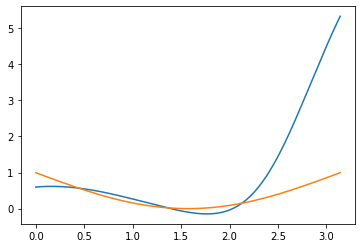

In [31]:
plt.plot(x_test, pred.detach().numpy())
plt.plot(x_test, (1 - np.sin(x_test))*np.cos(0.1))


In [32]:
# for contour plot

In [33]:

x1 = pi*torch.rand(1000000)
t1 = 0.5*torch.rand(1000000)
x1 = x1.reshape(-1, 1)
t1 = t1.reshape(-1, 1)
s = torch.cat([x1, t1], 1)
u_pred = my_network(s)
func2 = u_pred[:,4].reshape(-1, )
func2 = func2.detach().numpy()
x1 = x1.reshape(-1, )
t1 = t1.reshape(-1, )
x1 = x1.detach().numpy()
t1 = t1.detach().numpy()
u_test = (1-np.sin(x1))*np.cos(t1)

print(func2.shape)
print(x1.shape)
print(t1.shape)

(1000000,)
(1000000,)
(1000000,)


In [34]:
r_f = np.abs(func2 - u_test)

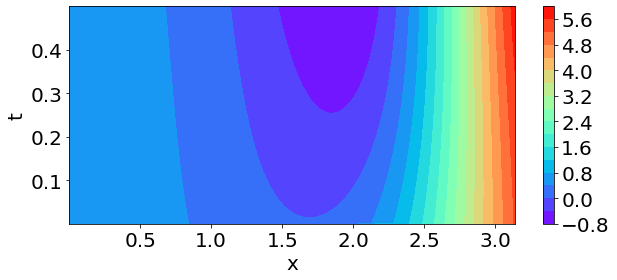

In [35]:
plt.rcParams['figure.figsize'] = [10, 4]
CS = plt.tricontourf(x1, t1, func2, 20, cmap='rainbow')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('t', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('inverse_func_doublebeam.png', dpi = 300, bbox_inches = "tight")
plt.show()

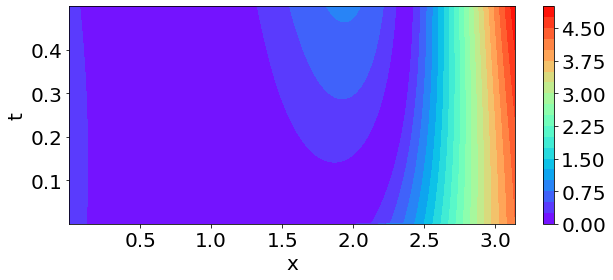

In [36]:
plt.rcParams['figure.figsize'] = [10, 4]
CS = plt.tricontourf(x1, t1, r_f, 20, cmap='rainbow')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('t', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('inverse_error_doublebeam.png', dpi = 300, bbox_inches = "tight")
plt.show()

In [37]:
exact = (1 - np.sin(x1))*np.cos(t1)

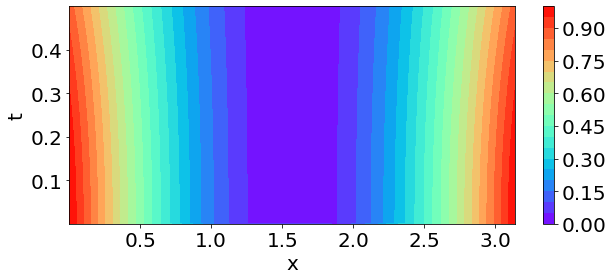

In [38]:
plt.rcParams['figure.figsize'] = [10, 4]
CS = plt.tricontourf(x1, t1, u_test, 20, cmap='rainbow')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('t', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('inverse_func_doublebeam.png', dpi = 300, bbox_inches = "tight")
plt.show()